This is all related to the Gradient Boost and XGBoost.

Using the same Rossman Sales Data for learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
store = pd.read_csv('store.csv')
test_data = pd.read_csv('test.csv', index_col=0)
data_raw = pd.read_csv('train.csv', low_memory=False)
# data_raw.head()

store.shape, test_data.shape, data_raw.shape

((1115, 10), (41088, 7), (1017209, 9))

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
test_data.columns, data_raw.columns

(Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
        'SchoolHoliday'],
       dtype='object'),
 Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday'],
       dtype='object'))

Only **sales** and **Customers** data is not available for making the predection, which are the columns of our Interest

In [5]:
data_raw = data_raw.merge(store, how='left', on='Store')
test_data = test_data.merge(store, how='left', on='Store')
data_raw

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
def splitDate(df):
    df.Date = pd.to_datetime(df.Date)
    df['Day'] = df.Date.dt.day
    df['Month'] = df.Date.dt.month
    df['Year'] = df.Date.dt.year
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [7]:
splitDate(data_raw)
splitDate(test_data)

In [8]:
data_raw

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,1,1,2013,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,1,1,2013,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,1,1,2013,1


In [9]:
data_raw[data_raw.Open == 0].Sales.value_counts()

Sales
0    172817
Name: count, dtype: int64

This section we can hard code that when the store is not opened then the sales = 0

In [10]:
data = data_raw[data_raw.Open == 1]
data.shape

(844392, 22)

In [11]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year',
       'WeekOfYear'],
      dtype='object')

In [12]:
def compMonth(df) :
    df['CometitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CometitionOpen'] = df.CometitionOpen.map(lambda x : 0 if x<0 else x).fillna(0)

In [13]:
compMonth(data)
compMonth(test_data)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_23516\3938821240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CometitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
C:\Users\Ayush\AppData\Local\Temp\ipykernel_23516\3938821240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CometitionOpen'] = df.CometitionOpen.map(lambda x : 0 if x<0 else x).fillna(0)


In [14]:
data.sample(6)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,WeekOfYear,CometitionOpen
505329,1020,6,2014-04-05,10696,1311,1,0,0,0,a,...,2015.0,0,NaN,NaN,NaN,5,4,2014,14,0.0
797789,235,2,2013-07-16,7729,586,1,1,0,1,a,...,2012.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",16,7,2013,29,16.0
741530,841,4,2013-09-05,2452,410,1,0,0,0,a,...,2004.0,0,NaN,NaN,NaN,5,9,2013,36,109.0
925949,170,6,2013-03-23,4148,451,1,0,0,0,a,...,2015.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",23,3,2013,12,0.0
976802,848,3,2013-02-06,5783,699,1,1,0,0,a,...,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",6,2,2013,6,67.0
382029,868,2,2014-07-29,10210,651,1,1,0,1,d,...,2005.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct",29,7,2014,31,107.0


In [15]:
num_cols = data.describe().columns.tolist()
num_cols.remove('Open')
num_cols

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Day',
 'Month',
 'Year',
 'WeekOfYear',
 'CometitionOpen']

In [16]:
data[num_cols].corr().Sales.sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
WeekOfYear                   0.074472
Month                        0.073600
Date                         0.062757
SchoolHoliday                0.038617
Year                         0.036169
CompetitionOpenSinceYear     0.016101
Store                        0.007710
CometitionOpen              -0.003196
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Day                         -0.051849
Promo2                      -0.127596
DayOfWeek                   -0.178736
Name: Sales, dtype: float64

In [17]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year',
       'WeekOfYear', 'CometitionOpen'],
      dtype='object')

In [18]:
def sort_store(df) : 
    global sorted_store_df
    sorted_store_df = df.groupby('Store').Sales.mean().reset_index()
    sorted_store_df['Sales_Rank'] = sorted_store_df['Sales'].rank(ascending=False, method='dense').astype(int)
    sorted_store_df.drop(columns = 'Sales', inplace= True)

def addRank(df, sorted_store_df):
    return df.merge(sorted_store_df, how='left', on='Store')
    
sort_store(data)
data = addRank(data, sorted_store_df)
test_data = addRank(test_data, sorted_store_df)

data.sample(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,WeekOfYear,CometitionOpen,Sales_Rank
776744,155,3,2013-03-13,4156,441,1,0,0,0,d,...,1,35.0,2010.0,"Jan,Apr,Jul,Oct",13,3,2013,11,0.0,503
284117,502,2,2014-09-09,8341,1272,1,0,0,0,a,...,1,37.0,2009.0,"Jan,Apr,Jul,Oct",9,9,2014,37,151.0,63
348945,317,6,2014-06-21,5297,616,1,0,0,0,d,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",21,6,2014,25,11.0,820


In [19]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year',
       'WeekOfYear', 'CometitionOpen', 'Sales_Rank'],
      dtype='object')

In [20]:
sorted_store_df

,Store,Sales_Rank
0,1,961
1,2,915
2,3,486
3,4,115
4,5,975
...,...,...
1110,1111,855
1111,1112,85
1112,1113,550
1113,1114,3


In [21]:
data.shape

(844392, 24)

### Input and Target

In [22]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year',
       'WeekOfYear', 'CometitionOpen', 'Sales_Rank'],
      dtype='object')

In [23]:
num_cols = ['Promo' ,'SchoolHoliday',  'CompetitionDistance', 'Promo2', 'Day',  'Month', 'Year', 'WeekOfYear', 'CometitionOpen', 'Sales_Rank']
cat_cols = ['DayOfWeek', 'StoreType', 'Assortment', 'StateHoliday']
# Skipping Promo2SinceWeek, Promo2SinceYear for now can be used as per the use case
tarCol = ['Sales']

In [24]:
input = data[num_cols + cat_cols].copy()
targets = data[tarCol].copy()
test_inp = test_data[num_cols + cat_cols].copy()

In [25]:
data[num_cols + tarCol].corr().Sales

Promo                  0.368145
SchoolHoliday          0.038617
CompetitionDistance   -0.036396
Promo2                -0.127596
Day                   -0.051849
Month                  0.073600
Year                   0.036169
WeekOfYear             0.074472
CometitionOpen        -0.003196
Sales_Rank            -0.692212
Sales                  1.000000
Name: Sales, dtype: float64

In [26]:
data[cat_cols].nunique()

DayOfWeek       7
StoreType       4
Assortment      3
StateHoliday    4
dtype: int64

In [27]:
input.shape, test_inp.shape

((844392, 14), (41088, 14))

In [28]:
num_cols

['Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'Day',
 'Month',
 'Year',
 'WeekOfYear',
 'CometitionOpen',
 'Sales_Rank']

In [29]:
cat_cols

['DayOfWeek', 'StoreType', 'Assortment', 'StateHoliday']

In [30]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,WeekOfYear,CometitionOpen,Sales_Rank
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,31,7,2015,31,82.0,961
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,31,92.0,915
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31,103.0,486
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,NaN,NaN,NaN,31,7,2015,31,70.0,115
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,NaN,NaN,NaN,31,7,2015,31,3.0,975


### Imputing the Missing values

In [31]:
data[num_cols].isna().sum()

Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
Promo2                    0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
CometitionOpen            0
Sales_Rank                0
dtype: int64

In [32]:
test_data[num_cols].isna().sum()

Promo                   0
SchoolHoliday           0
CompetitionDistance    96
Promo2                  0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
CometitionOpen          0
Sales_Rank              0
dtype: int64

In [33]:
max_competition_dist = data.CompetitionDistance.max()
max_competition_dist

75860.0

Filling the missing competition distance with double of the max distance that is there.

In [34]:
data.CompetitionDistance.fillna(max_competition_dist*2, inplace=True)
test_data.CompetitionDistance.fillna(max_competition_dist*2, inplace=True)
data[num_cols].isna().sum()

Promo                  0
SchoolHoliday          0
CompetitionDistance    0
Promo2                 0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
CometitionOpen         0
Sales_Rank             0
dtype: int64

### Scaling the inputs

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data[num_cols])

In [36]:
data[num_cols] = scaler.transform(data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

### Encoding the calegorial Columns

In [37]:
for col in cat_cols:
    print(col, data[col].unique())

DayOfWeek [5 4 3 2 1 7 6]
StoreType ['c' 'a' 'd' 'b']
Assortment ['a' 'c' 'b']
StateHoliday ['0' 'a' 'b' 'c']


In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
encoded_cols

c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

In [39]:
data[encoded_cols] = encoder.transform(data[cat_cols])
test_data[encoded_cols] = encoder.transform(test_data[cat_cols])

In [40]:
data.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
451881,937,5,2014-02-28,7212,605,1,0.0,0,0.0,d,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
410730,1081,6,2014-04-12,2678,482,1,0.0,0,0.0,b,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
49058,947,4,2015-06-11,6013,866,1,0.0,0,0.0,a,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
413985,992,3,2014-04-09,5470,737,1,0.0,0,0.0,a,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
46386,504,6,2015-06-13,6225,882,1,0.0,0,0.0,c,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [41]:
len(data.columns)

42

In [42]:
num_cols

['Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'Day',
 'Month',
 'Year',
 'WeekOfYear',
 'CometitionOpen',
 'Sales_Rank']

In [43]:
len(encoded_cols + num_cols)

28

There are 42 columns in the Data but we are going to use only the 28 Columns that we have in encoded and Numeriacal 

In [44]:
x_train = data[num_cols + encoded_cols]
y_train = data[tarCol]
x_test = test_data[num_cols + encoded_cols]

x_train.shape, y_train.shape, x_test.shape

((844392, 28), (844392, 1), (41088, 28))

## Training the Model

In [45]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state = len(x_train), n_jobs = -1, n_estimators = 20 , max_depth = 4)

In [48]:
%%time
model.fit(x_train, y_train)

CPU times: total: 6.92 s
Wall time: 1.62 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=844392, ...)

In [49]:
pre = model.predict(x_train)
pre

array([ 6000.1265,  6524.418 ,  8634.244 , ..., 10040.024 ,  6293.743 ,
        9024.199 ], dtype=float32)

### Evaluation

In [50]:
from sklearn.metrics import mean_squared_error
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [51]:
rmse(y_train, pre)

1206.707000550575

In [52]:
data.Sales.min(), data.Sales.max()

(0, 41551)

In [53]:
import matplotlib.pyplot as plt

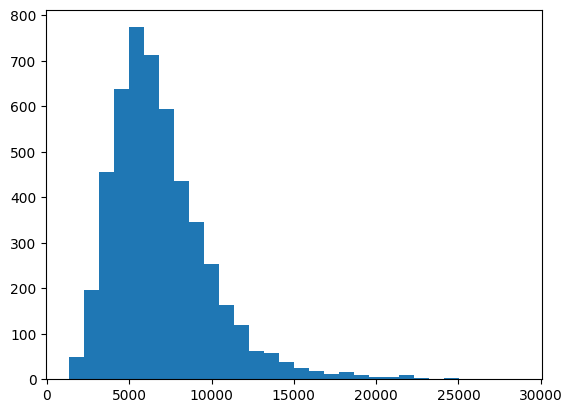

In [60]:
plt.hist(data.Sales.sample(5000), bins = 30)
plt.show()

In [61]:
test_pre = model.predict(x_test)

### Feature Importance

In [82]:
importancedf = pd.DataFrame({
    'feature' : x_train.columns.to_list(),
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importancedf.head(10)

,feature,importance
9,Sales_Rank,0.463299
0,Promo,0.243683
10,DayOfWeek_1,0.080712
7,WeekOfYear,0.031901
4,Day,0.026201
5,Month,0.026159
16,DayOfWeek_7,0.016835
1,SchoolHoliday,0.016510
14,DayOfWeek_5,0.014380
11,DayOfWeek_2,0.010634
